In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
warnings.simplefilter('ignore')

In [114]:
data = pd.read_csv('bike_buyers_clean.csv')

In [115]:
data.head(11)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,19280,Married,Male,20000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,48,Yes


In [116]:
data.shape

(1000, 13)

Task 1

Output descriptive statistics of the dataset: mean, median, standard deviation.

Here I have decided to present the statistics using additional lists, called 'mean', 'median' and 'std', where all the data from the chosen columns would be stored. Afterwards, I have created 'table' and assigned the DataFrame function from 'pandas' to this variable in order to print out the table with all needed information.

In [117]:
m = ['Income', 'Children', 'Age']
mean = []
median = []
std = []
for i in m:
    mean.append(data[i].mean())
    median.append(data[i].median())
    std.append(data[i].std())
table = pd.DataFrame({'mean': mean, 'median': median, 'std': std}, index = ['Income', 'Children', 'Age'])

In [118]:
table

,mean,median,std
Income,56140.000,60000.0,31081.609779
Children,1.908,2.0,1.626094
Age,44.190,43.0,11.353537


It can be clearly seen that the code below has output the table where the rows are the atributes of the initial dataset and the columns are previously counted mean, median and standard deviation values.

Task 2

Plot at least 3 numerical fields. Choose the plot type based on the data.

I used matplotlib.pyplot and seaborn. Firstly , I have input the size of the chart, gave it a name, using 'title' function, named the vertical axis, using 'ylabel' function and output the number of people sorted by the grounds of their age(using seaborn's countplot to create a colorful histogram).

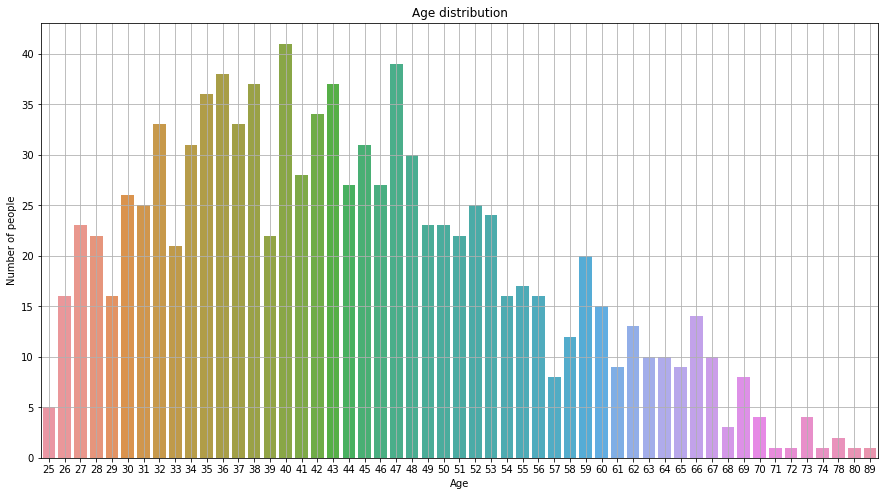

In [183]:
plt.figure(figsize=(15, 8))
plt.title('Age distribution')
sns.countplot(data['Age'])
plt.ylabel('Number of people')
plt.grid()

The bar chart above depicts the distribution of people by their age and it is clearly seen that most of those interested in purchasing bikes are in their forties and least interested are in late sixties.

In [120]:
data['Marital Status'].replace({'Married':1, 'Single':0}, inplace=True)

I replaced strings with numbers 1 and 0, due to the fact strings can not be counted and it is not possible to create statistics using words.

Text(0.5, 1.0, 'Who tends to buy more bikes')

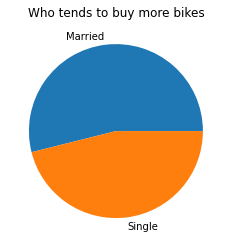

In [121]:
plt.pie(data['Marital Status'].value_counts(), labels=['Married','Single'])
plt.title('Who tends to buy more bikes')


By the pie chart above it can be seen that mostly married people purchase bikes, rather than single ones.However, if we think of it in a different way, married people are usually couples that may buy one bike for both of them, therefore it can be concluded that there are more bikes bought by single people.

In [122]:
data['Marital Status'].value_counts()

1    539
0    461
Name: Marital Status, dtype: int64

Here I have just counted the total number of Married (1) and Single(0) people to be more precise.

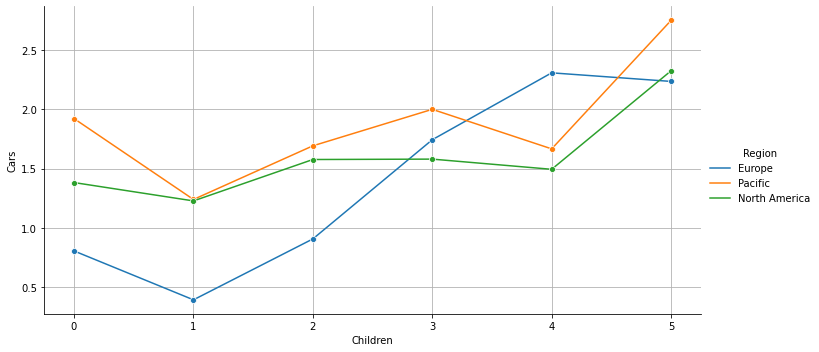

In [182]:
n = sns.relplot(data['Children'], data ['Cars'], data['Region'], hue = 'Region', 
            kind = 'line',ci = None, aspect = 2, marker = 'o')
plt.grid()

I passed an argument 'ci = None' to remove the line shadow and 'aspect' to extend the graph, so it would look less squeezed and more understandable.
The line graph above depicts the ratio of the number of cars to children in three different regions. It can be seen that North Americans have more cars in general, comparing to other states. The common trend here is -  the more kids in the family, the more cars the family possesses. Although, people in all regions have at least one car, despite not having kids. Moreover , the number of cars is not in integers, due to the fact the values on the vertical axis are approximate, to be more specific, the values represent the likelihood of purchasing a car in regards to having children.

Task 3

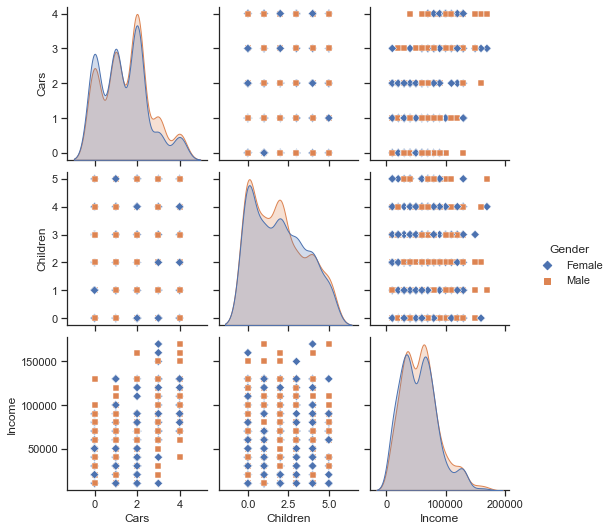

In [197]:
keys = ['Cars','Children', 'Income','Gender' ]
n = sns.pairplot(data[keys], hue = 'Gender', markers=["D", "s"])

In this graph it can be seen that, first of all, women have slightly less cars than men, both genders have similar pattern in both income and clirdren slots.

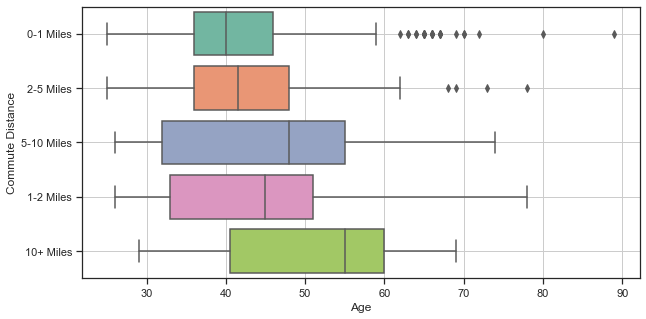

In [198]:
#the relation of commuted distance to the age 
plt.figure(figsize=(10, 5))
sns.boxplot(x = data['Age'], y = data['Commute Distance'], orient="h", palette="Set2")
plt.grid()

By the box plot above it can be stated that 10+ miles distance was commuted mostly by middle aged people (from 40 to 60 years), 5-10 miles were commuted by people aged from approximatelly 32 to 55 , being the most significant bar in the chart, while the least rates were for 0-1 miles.

I have briefly analyzed the data on bike buyers using different python libraries to scetch graphs.

First of all, I checked the descriptive statistics of the dataset: mean, median, standard deviation to see the average rates of income, the number of children, an the age of those, buying bikes.
 
Secondly, I was interested in the age of people, included in the given dataset, so I have created the bar chart to see the age distribution and came up with the conclusion that there are mostly people aged 40 and the least number was quite logically for retired people.

Afterwards, I got interested who tends to buy more bikes -  married or single people, so I decided to make a pie chart, I considered it to be the most convinient one as I had only two variables. Due to the fact, Married and Single are words that cannot be counted, I replaced those strings with '1' and '0' respectively.Mostly married people purchase bikes. I have as well counted the total number of those people by the category.

Then, I have scetched the line graph to see the relation of cars possession to the number of kids in three different regions.The common trend there was - the more kids in the family, the more cars the family has. Although,  some people in all 3 regions have at least one car, despite not having kids.

In the last task I have at first made a pairplot to see the correlation between four categories in the given dataset, namely cars, children, income and gender. To present the data in the most comprehensive way,I grouped the variables by gender using 'hue' function.
 
And, lastly, I made the box plot, to see the proportion of people commuting different distances and made a small conclusion of what I was able to see by the graph.

